<a href="https://www.kaggle.com/code/heshamibrahem/mcdonald-s-india?scriptVersionId=115764296" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mcdonalds-india-menu-nutrition-facts/India_Menu.csv


In [2]:
df = pd.read_csv("../input/mcdonalds-india-menu-nutrition-facts/India_Menu.csv") # read csv
df.head(10) # show first 10 rows

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24
5,Regular Menu,Veg Maharaja Mac,306 g,832.67,24.17,37.94,16.83,0.28,36.19,93.84,11.52,6.92,1529.22
6,Regular Menu,Green Chilli Aloo Naan,132 g,356.09,7.91,15.08,6.11,0.24,9.45,46.36,4.53,1.15,579.60
7,Regular Menu,Pizza Puff,87 g,228.21,5.45,11.44,5.72,0.09,5.17,24.79,2.73,0.35,390.74
8,Regular Menu,Mc chicken Burger,173 g,400.80,15.66,15.70,5.47,0.16,31.17,47.98,5.53,4.49,766.33
9,Regular Menu,FILLET-O-FISH Burger,136 g,348.11,15.44,14.16,5.79,0.21,32.83,38.85,5.58,3.54,530.54


In [3]:
def infoo(df):
    df.info() # getting data frame information
    print("-" * 50)
    print(f"number of rows: {df.shape[0]}") # dataframe rows number
    print("-" * 50)
    print(f"number of columns: {df.shape[1]}") # dataframe columns number
    print("-" * 50)
    for c in df.columns:
        if df[c].dtype == 'float' or df[c].dtype == 'int': # if numerical values
            print("the values of {} are within range {} to {}".format(c,df[c].min(),df[c].max())) # get range
        else: # string or categorial values
            print("Number of Unique value of {} is: {}".format(c, len(df[c].unique()))) # get number of unqiue value
            print("Unique value of {} is: {}".format(c, df[c].unique())) # get unique values
            print("-" * 50)
    for c in df.columns:
        print("Nan number in {} is: {}".format(c, df[c].isna().sum())) # collect nan values
        print("-" * 50)

In [4]:
infoo(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Menu Category           141 non-null    object 
 1   Menu Items              141 non-null    object 
 2   Per Serve Size          141 non-null    object 
 3   Energy (kCal)           141 non-null    float64
 4   Protein (g)             141 non-null    float64
 5   Total fat (g)           141 non-null    float64
 6   Sat Fat (g)             141 non-null    float64
 7   Trans fat (g)           141 non-null    float64
 8   Cholesterols (mg)       141 non-null    float64
 9   Total carbohydrate (g)  141 non-null    float64
 10  Total Sugars (g)        141 non-null    float64
 11  Added Sugars (g)        141 non-null    float64
 12  Sodium (mg)             140 non-null    float64
dtypes: float64(10), object(3)
memory usage: 14.4+ KB
----------------------------------------------

In [5]:
df.dropna(inplace = True) # drop nan row
df.info() # see info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 140
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Menu Category           140 non-null    object 
 1   Menu Items              140 non-null    object 
 2   Per Serve Size          140 non-null    object 
 3   Energy (kCal)           140 non-null    float64
 4   Protein (g)             140 non-null    float64
 5   Total fat (g)           140 non-null    float64
 6   Sat Fat (g)             140 non-null    float64
 7   Trans fat (g)           140 non-null    float64
 8   Cholesterols (mg)       140 non-null    float64
 9   Total carbohydrate (g)  140 non-null    float64
 10  Total Sugars (g)        140 non-null    float64
 11  Added Sugars (g)        140 non-null    float64
 12  Sodium (mg)             140 non-null    float64
dtypes: float64(10), object(3)
memory usage: 15.3+ KB


> **Per Serve Size is object because it ends with g or ml so we need to divide it to 2 columns first columns has the numerical values and the other column is g or ml**

In [6]:
df[['Per Serve Size no', 'Per Serve Size (g/ml)']] = df['Per Serve Size'].str.split(' ', 1, expand=True) # spliting the column into 2 columns
df.drop("Per Serve Size", axis=1, inplace=True) # delete the old column
df['Per Serve Size no'] = df['Per Serve Size no'].astype("float")
df.head(10) # show top 10 rows

,Menu Category,Menu Items,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg),Per Serve Size no,Per Serve Size (g/ml)
0,Regular Menu,McVeggie™ Burger,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13,168.0,g
1,Regular Menu,McAloo Tikki Burger®,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34,146.0,g
2,Regular Menu,McSpicy™ Paneer Burger,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58,199.0,g
3,Regular Menu,Spicy Paneer Wrap,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46,250.0,g
4,Regular Menu,American Veg Burger,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24,177.0,g
5,Regular Menu,Veg Maharaja Mac,832.67,24.17,37.94,16.83,0.28,36.19,93.84,11.52,6.92,1529.22,306.0,g
6,Regular Menu,Green Chilli Aloo Naan,356.09,7.91,15.08,6.11,0.24,9.45,46.36,4.53,1.15,579.60,132.0,g
7,Regular Menu,Pizza Puff,228.21,5.45,11.44,5.72,0.09,5.17,24.79,2.73,0.35,390.74,87.0,g
8,Regular Menu,Mc chicken Burger,400.80,15.66,15.70,5.47,0.16,31.17,47.98,5.53,4.49,766.33,173.0,g
9,Regular Menu,FILLET-O-FISH Burger,348.11,15.44,14.16,5.79,0.21,32.83,38.85,5.58,3.54,530.54,136.0,g


> **First let's find which category has the highest (Energy, protein ,etc)**

In [7]:
co = df.columns # list of columns
co

Index(['Menu Category', 'Menu Items', 'Energy (kCal)', 'Protein (g)',
       'Total fat (g)', 'Sat Fat (g)', 'Trans fat (g)', 'Cholesterols (mg)',
       'Total carbohydrate (g)', 'Total Sugars (g)', 'Added Sugars (g)',
       'Sodium (mg)', 'Per Serve Size no', 'Per Serve Size (g/ml)'],
      dtype='object')

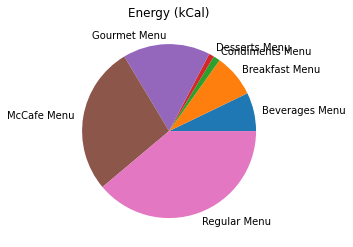

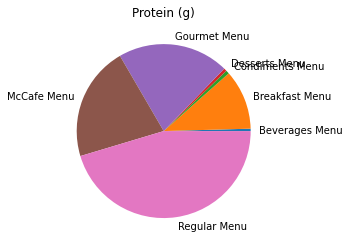

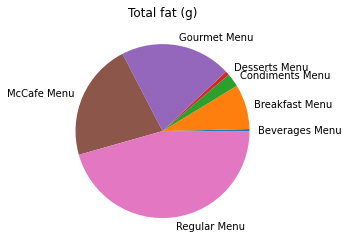

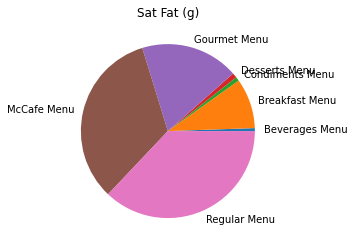

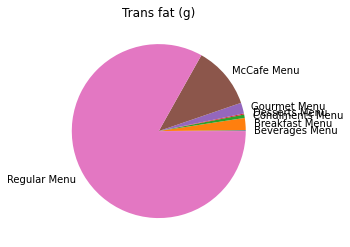

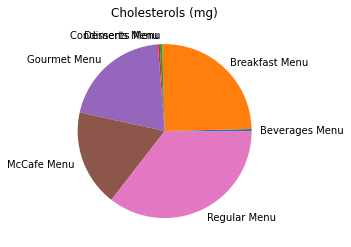

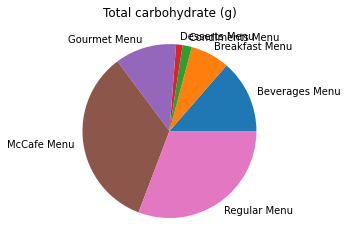

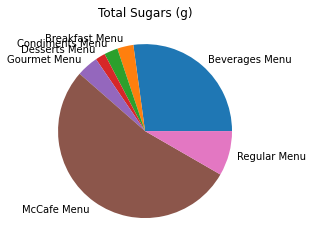

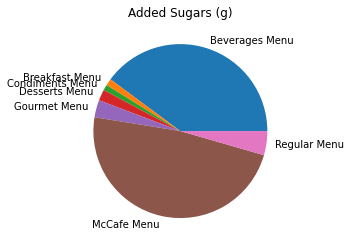

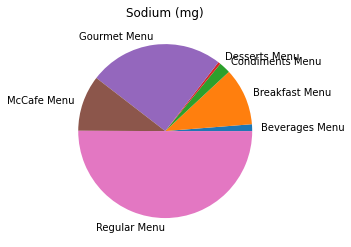

In [8]:
import matplotlib.pyplot as plt
x = ['Energy (kCal)', 'Protein (g)',
       'Total fat (g)', 'Sat Fat (g)', 'Trans fat (g)', 'Cholesterols (mg)',
       'Total carbohydrate (g)', 'Total Sugars (g)', 'Added Sugars (g)',
       'Sodium (mg)'] # which we will compare
for i in x:
    s = df.groupby("Menu Category").agg("sum") #group with sum
    y = s[i]
    mylabels = s.index
    plt.pie(y, labels = mylabels)
    plt.title(i)
    plt.show() 

> **Regular Menu is the highest in the most label but MyCafe Menu is the highest in [Added sugar, Total sugars, Total carbohydrate]**

> **In this line of code we will split per serve size into 2 groups to be easy to compare**

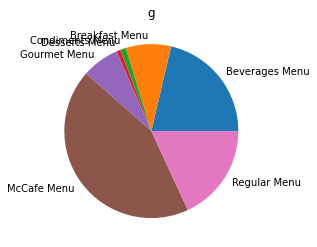

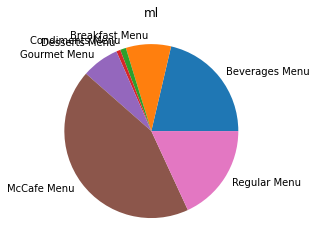

In [9]:
g_ml = df['Per Serve Size (g/ml)'].unique()
for i in g_ml:
    s = df[df['Per Serve Size (g/ml)'] == i]
    s = df.groupby("Menu Category")['Per Serve Size no'].agg("sum") #group with sum
    y = list(s)
    mylabels = s.index
    plt.pie(y, labels = mylabels)
    plt.title(i)
    plt.show() 

> **MyCafe Menu has the highest Per Serve Size**

> **Now we want to see who has the highest rate for each items**

In [10]:
high_mycafe = ['Total carbohydrate (g)', 'Total Sugars (g)', 'Added Sugars (g)'] # highest my cafe
high_regular = ['Energy (kCal)', 'Protein (g)',
       'Total fat (g)', 'Sat Fat (g)', 'Trans fat (g)', 'Cholesterols (mg)',
       'Sodium (mg)'] # highest in regular

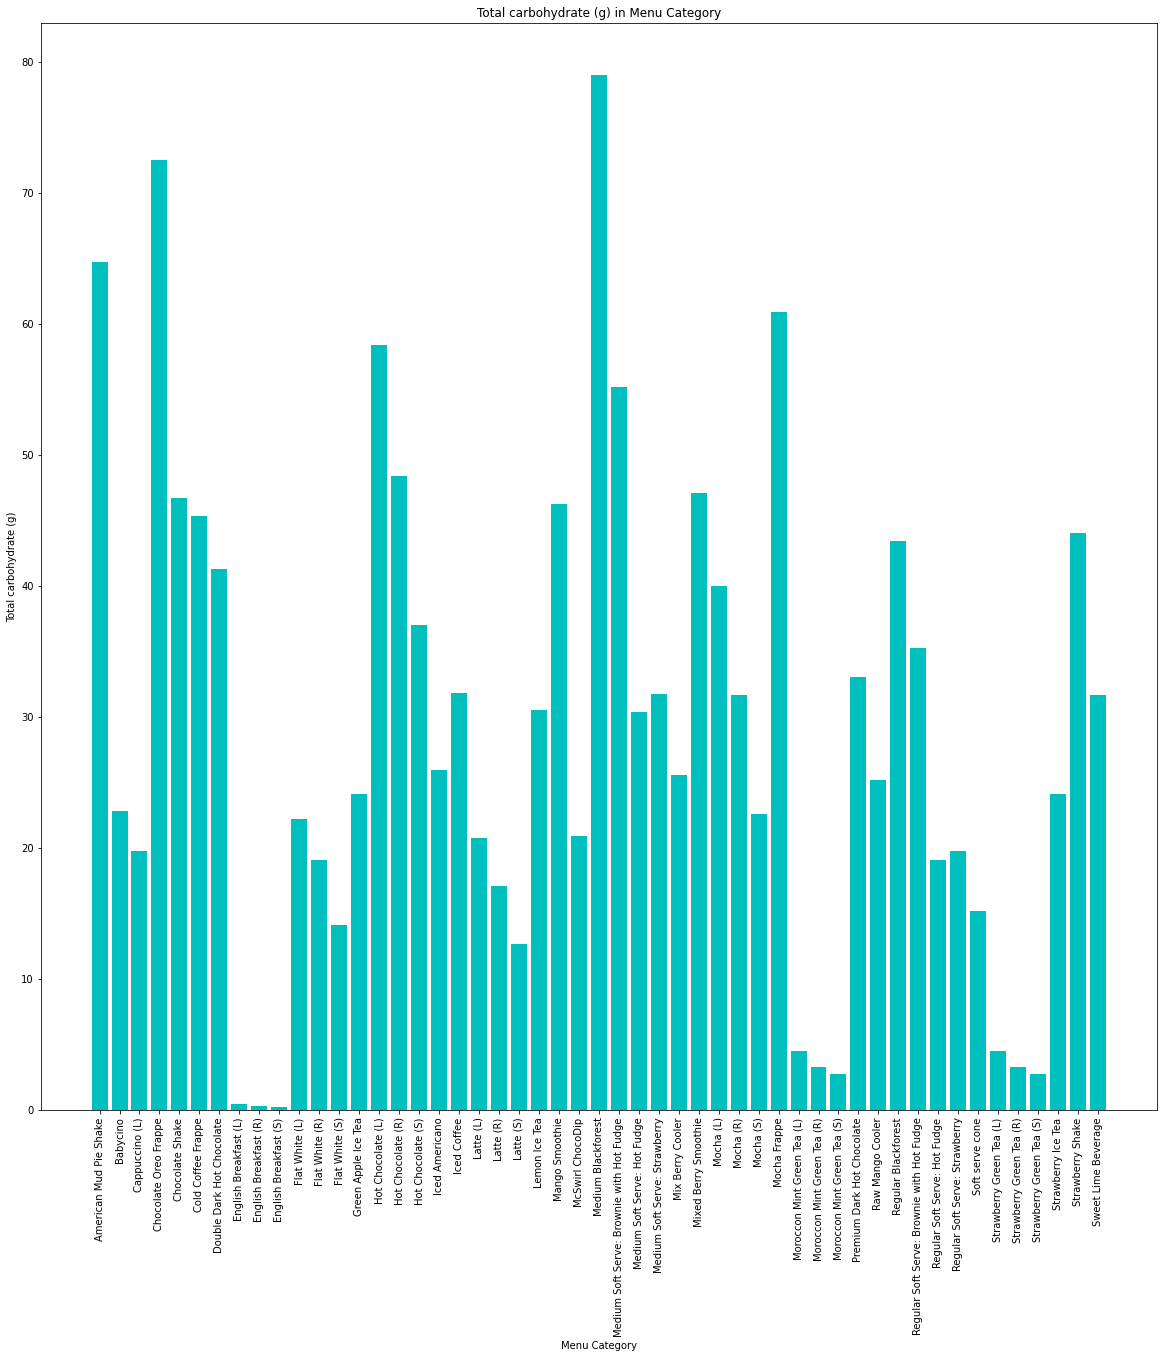

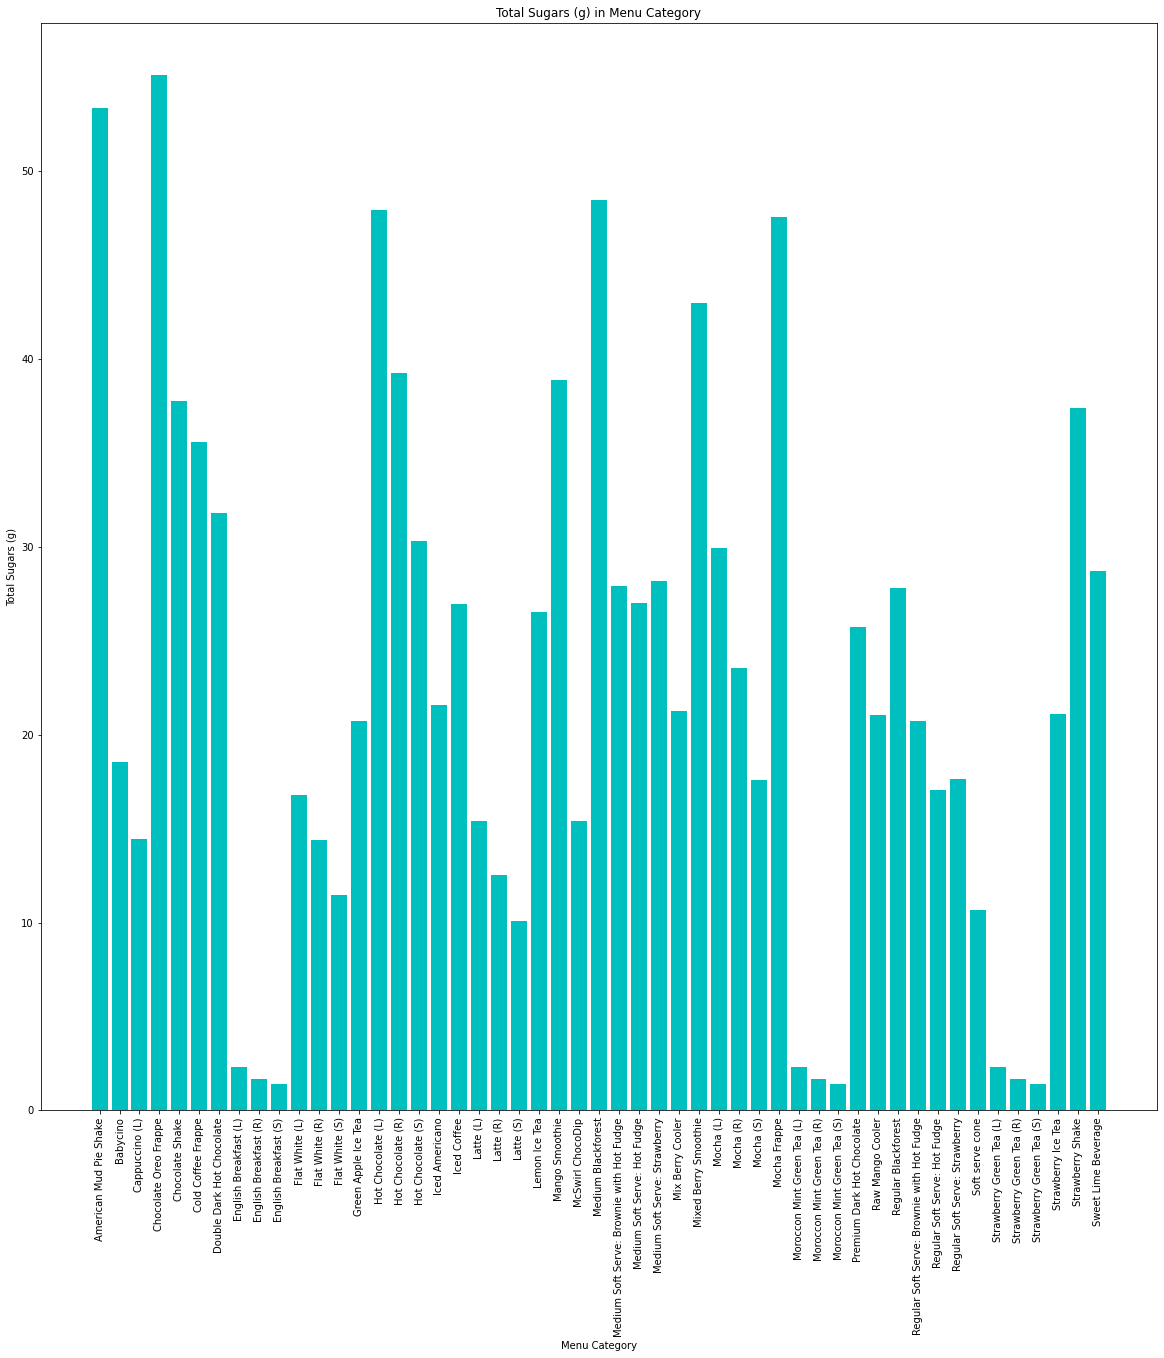

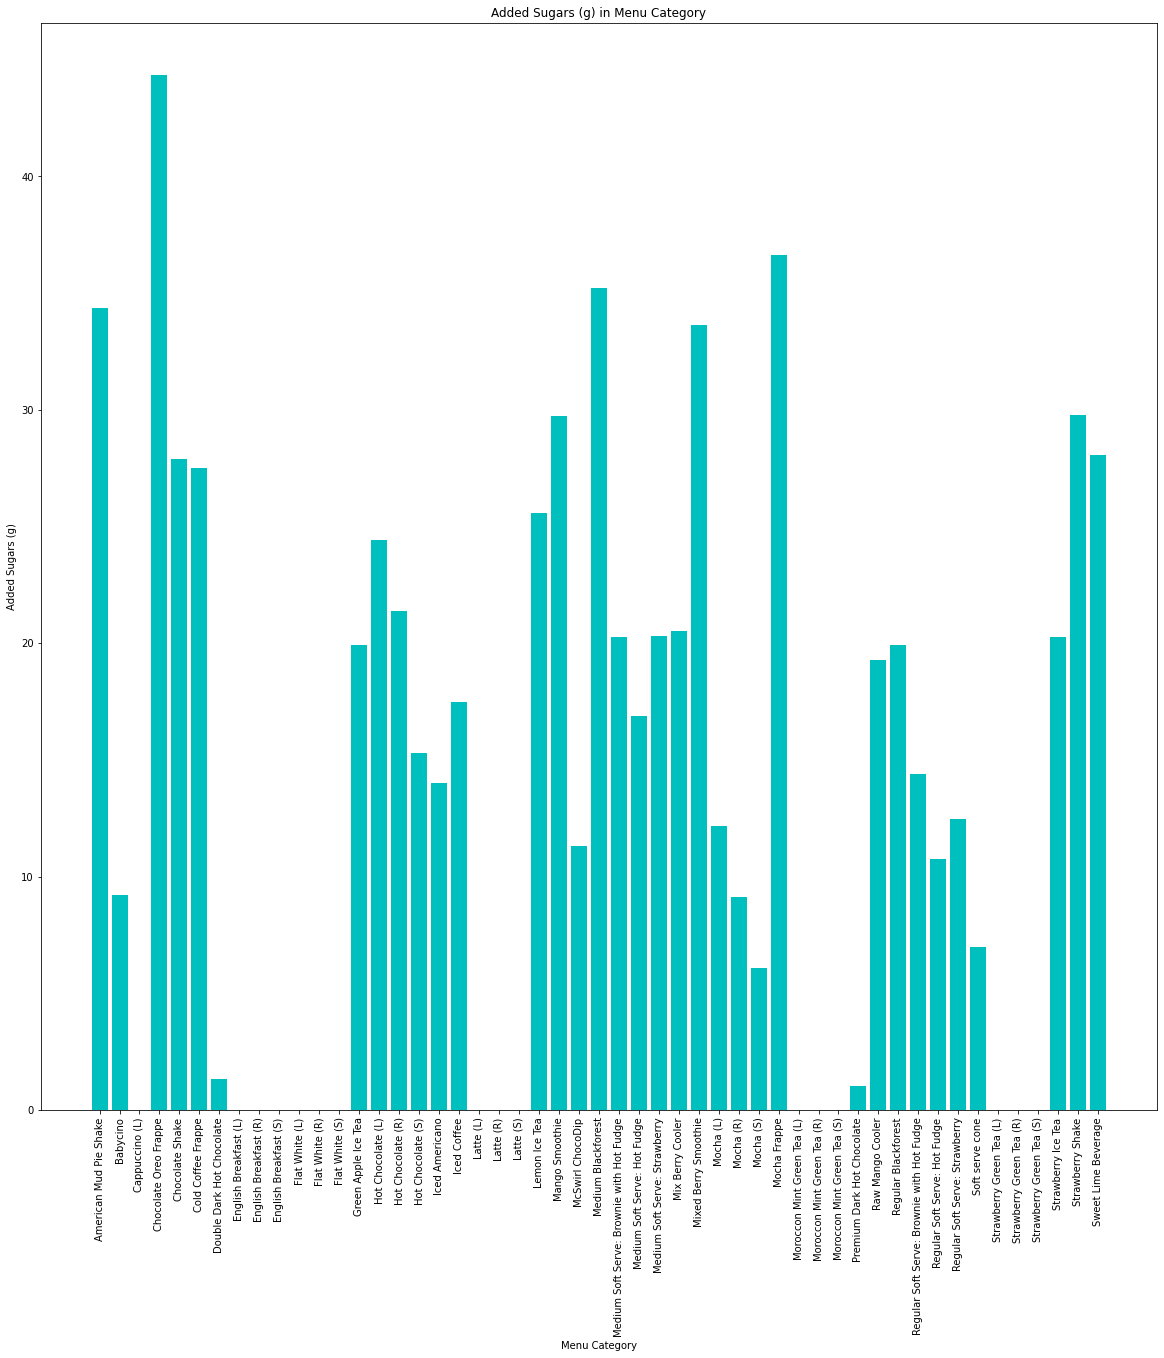

In [11]:
for i in high_mycafe:
    s = df[df["Menu Category"] == "McCafe Menu"]
    d = s.groupby("Menu Items").agg("sum") #group with sum
    y = d[i]
    mylabels = d.index
    fig = plt.figure(figsize = (20, 20))
    # creating the bar plot
    plt.bar(mylabels, y, color ='c')

    plt.xlabel("Menu Category")
    plt.xticks(rotation='vertical')
    plt.ylabel(i)
    plt.title("{} in Menu Category".format(i))
    plt.show()

> **Chocolate oreo frappe has the highest sugar**

> **Medium blackforest has the highest Total caybo..**

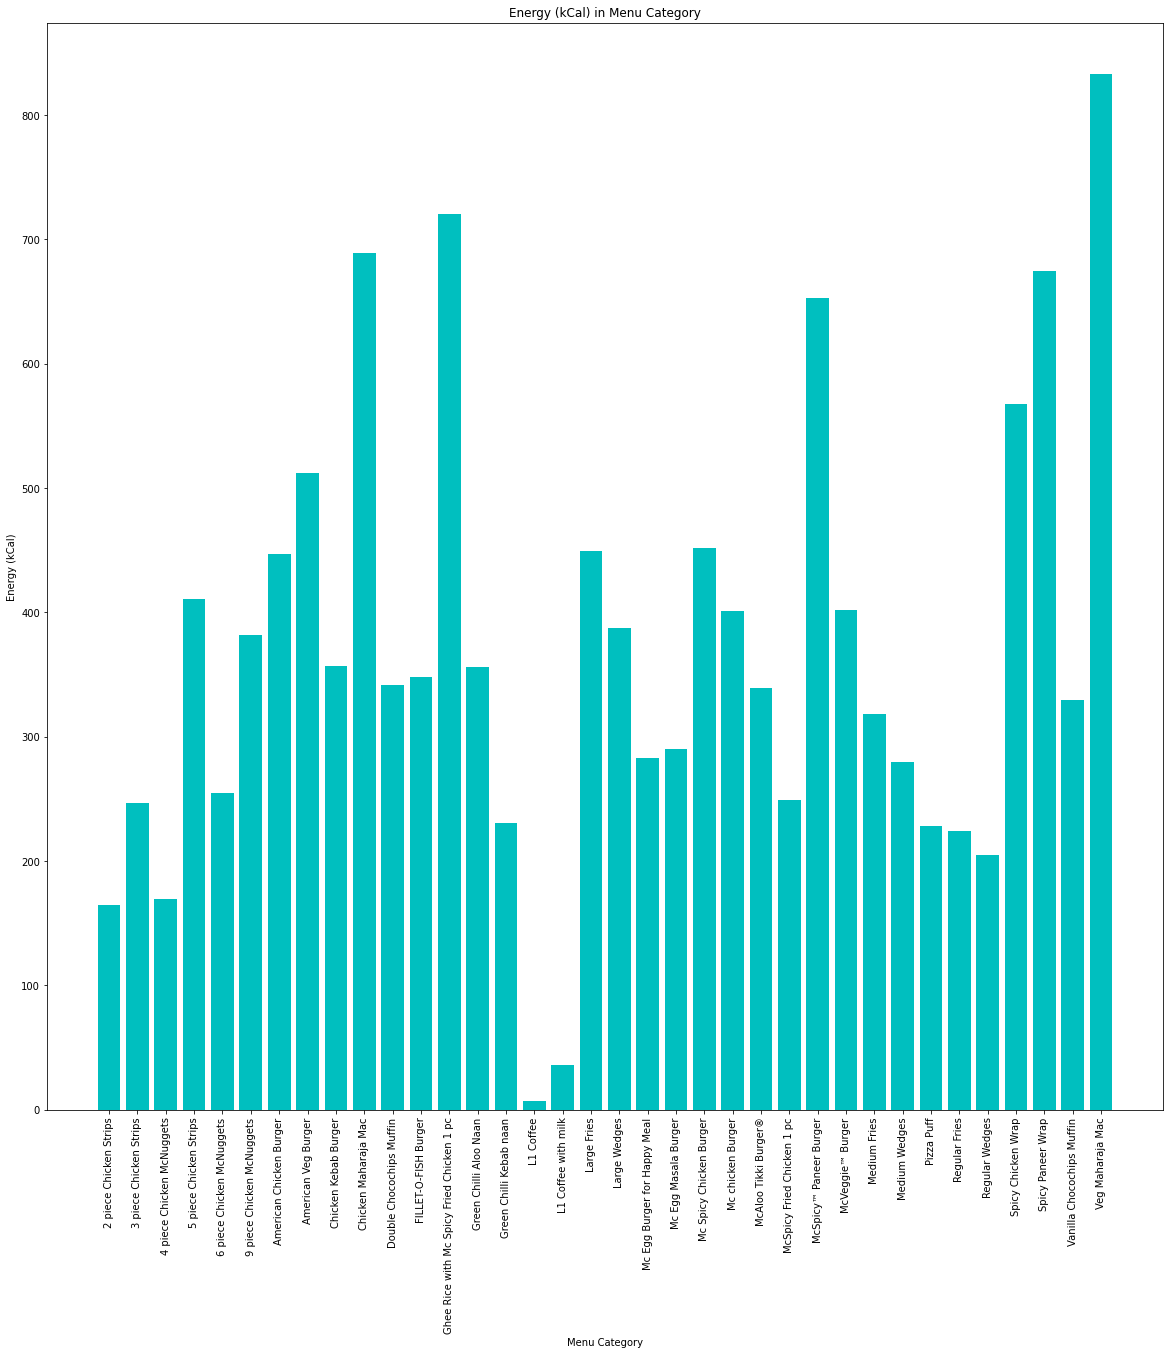

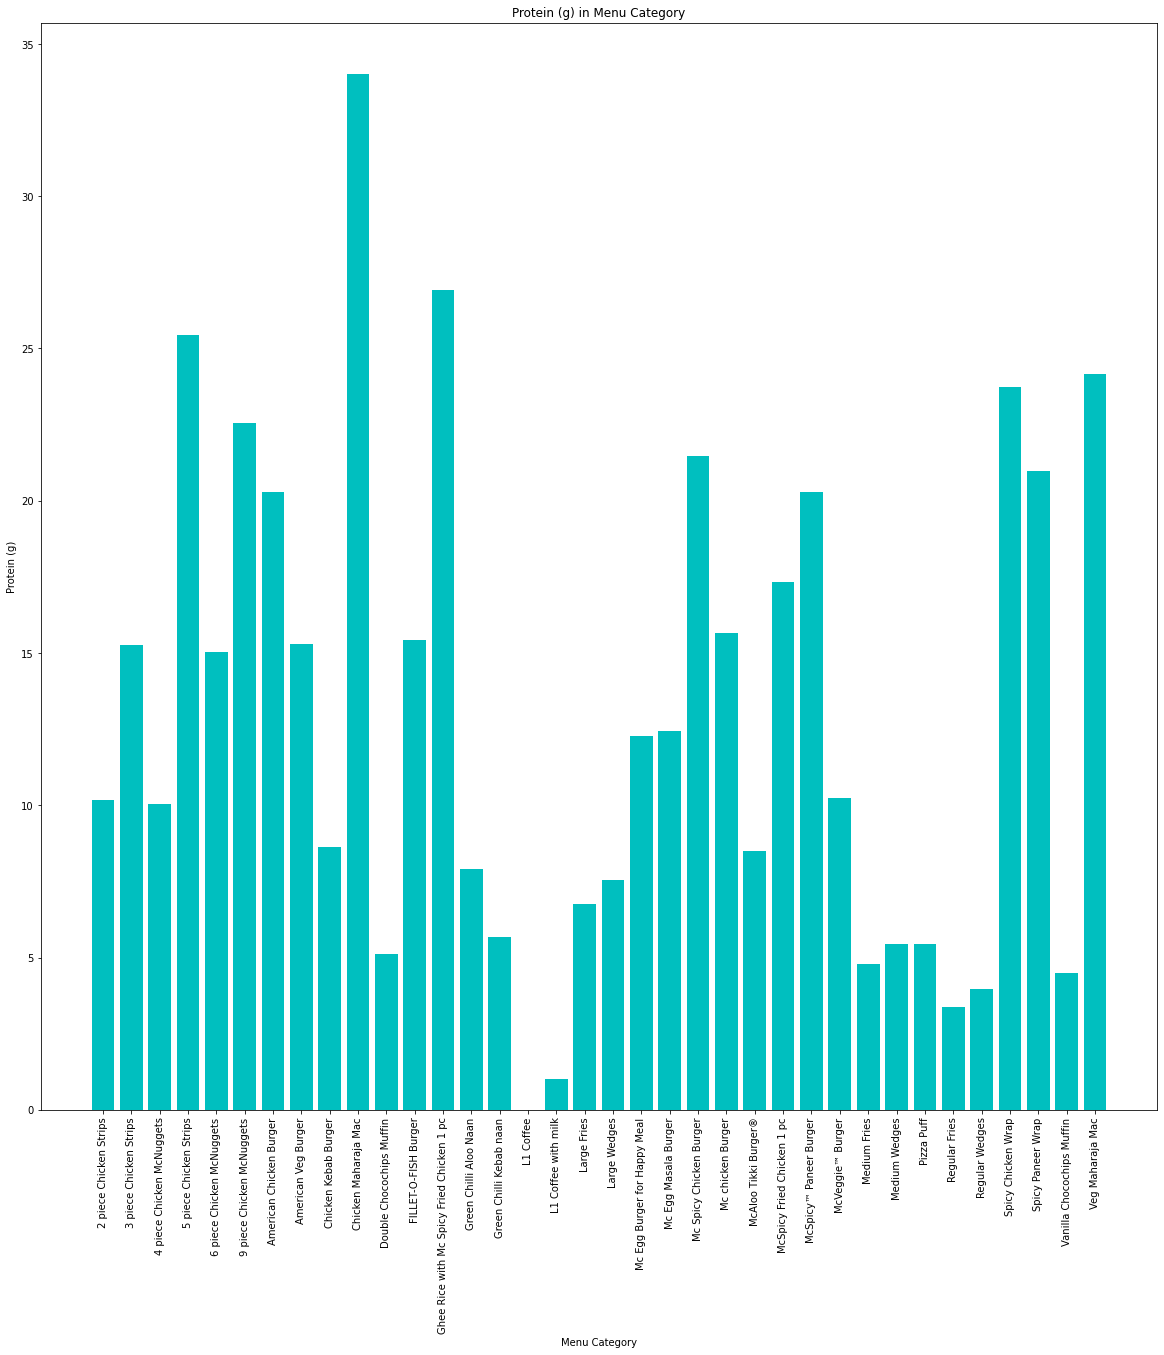

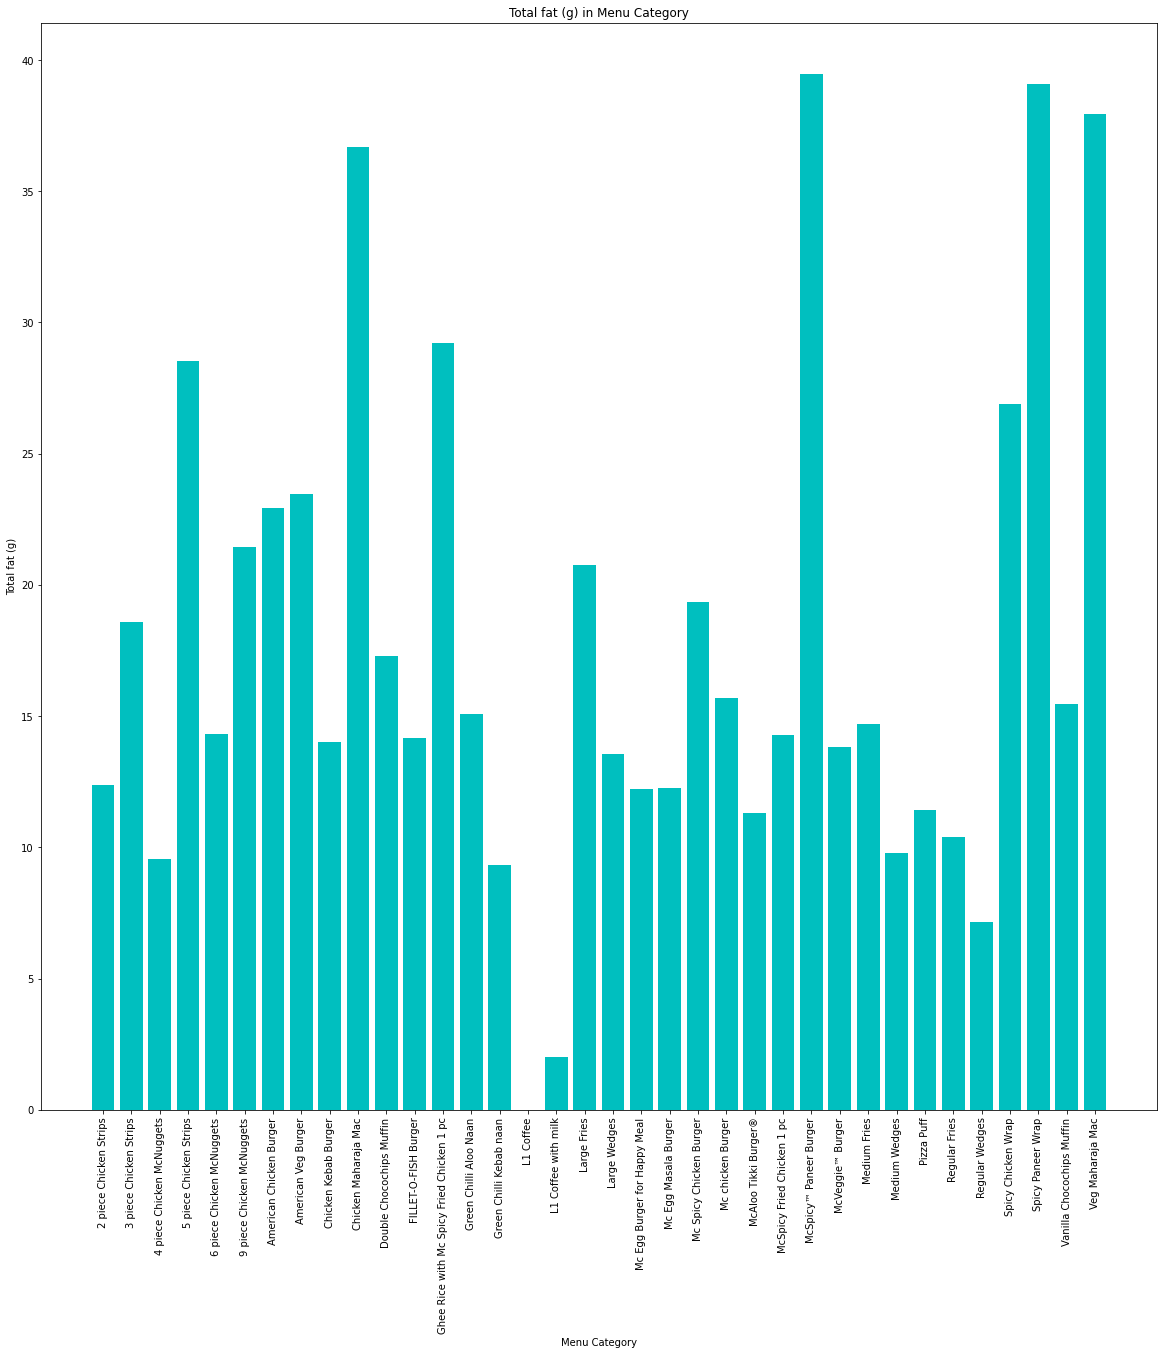

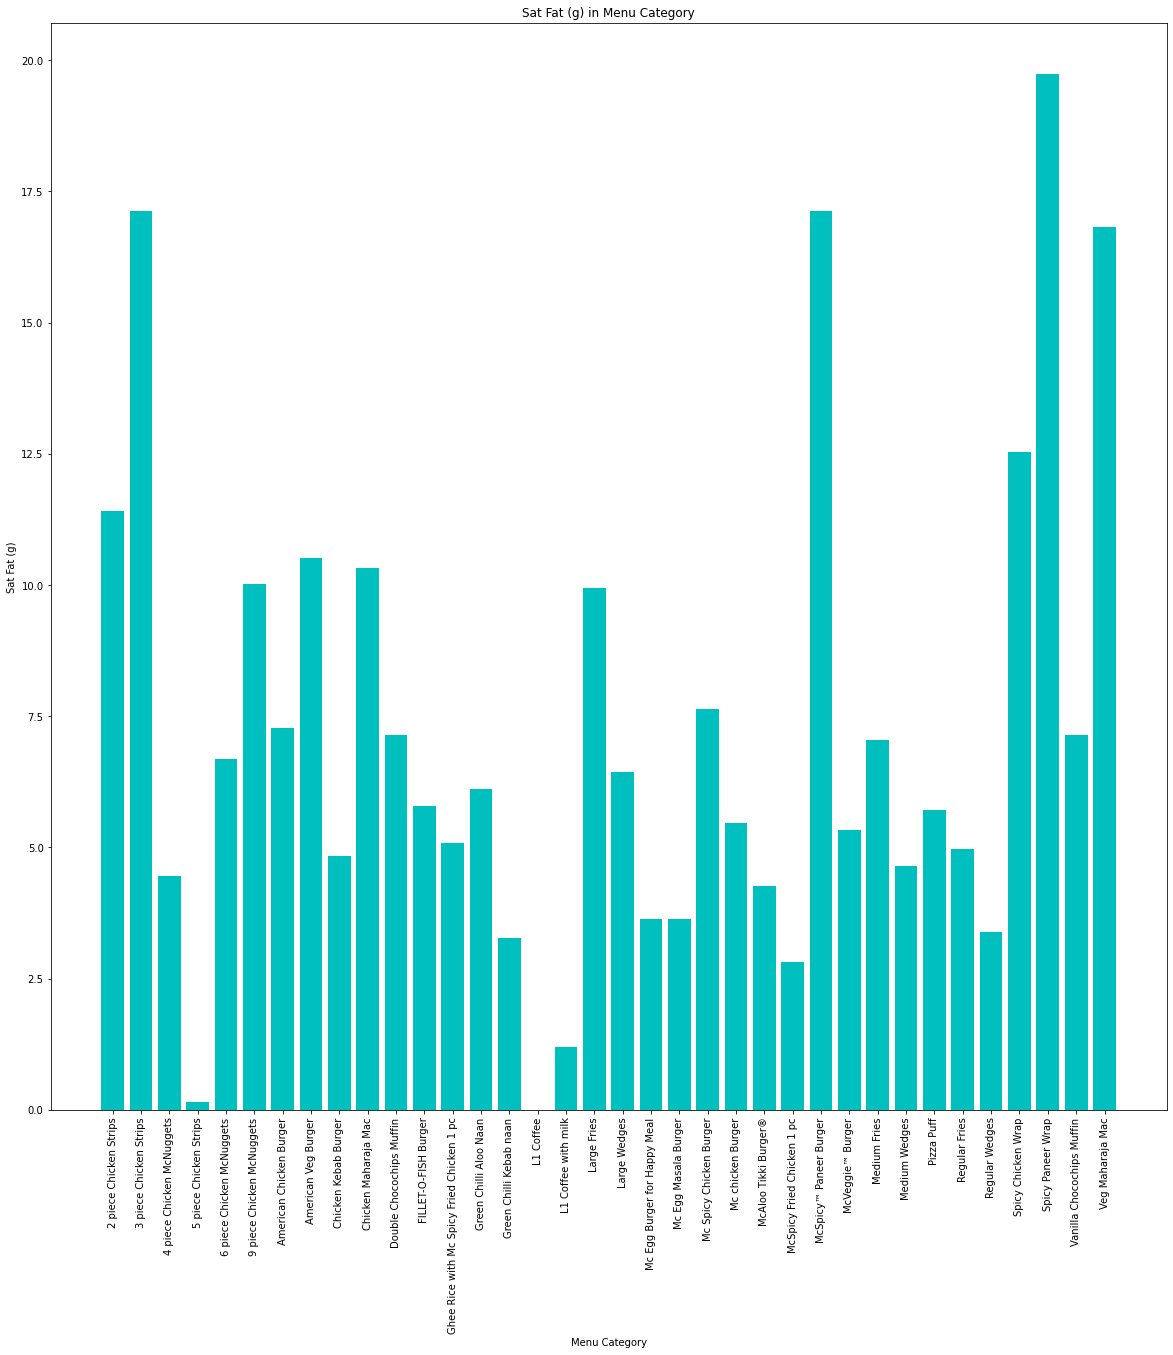

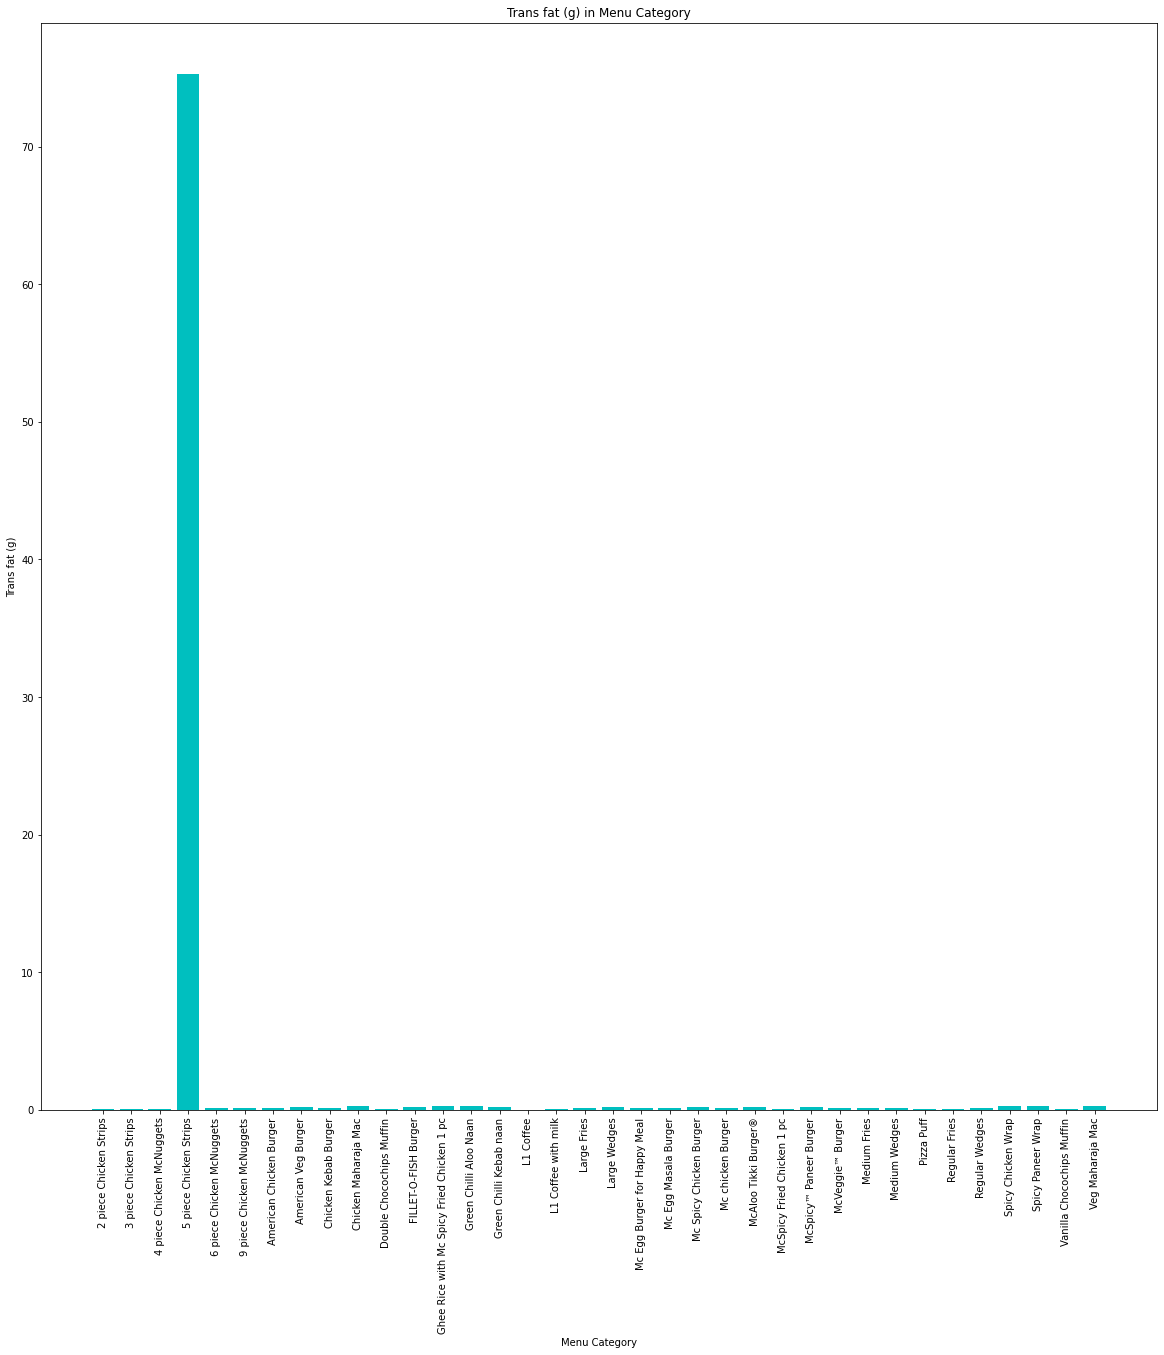

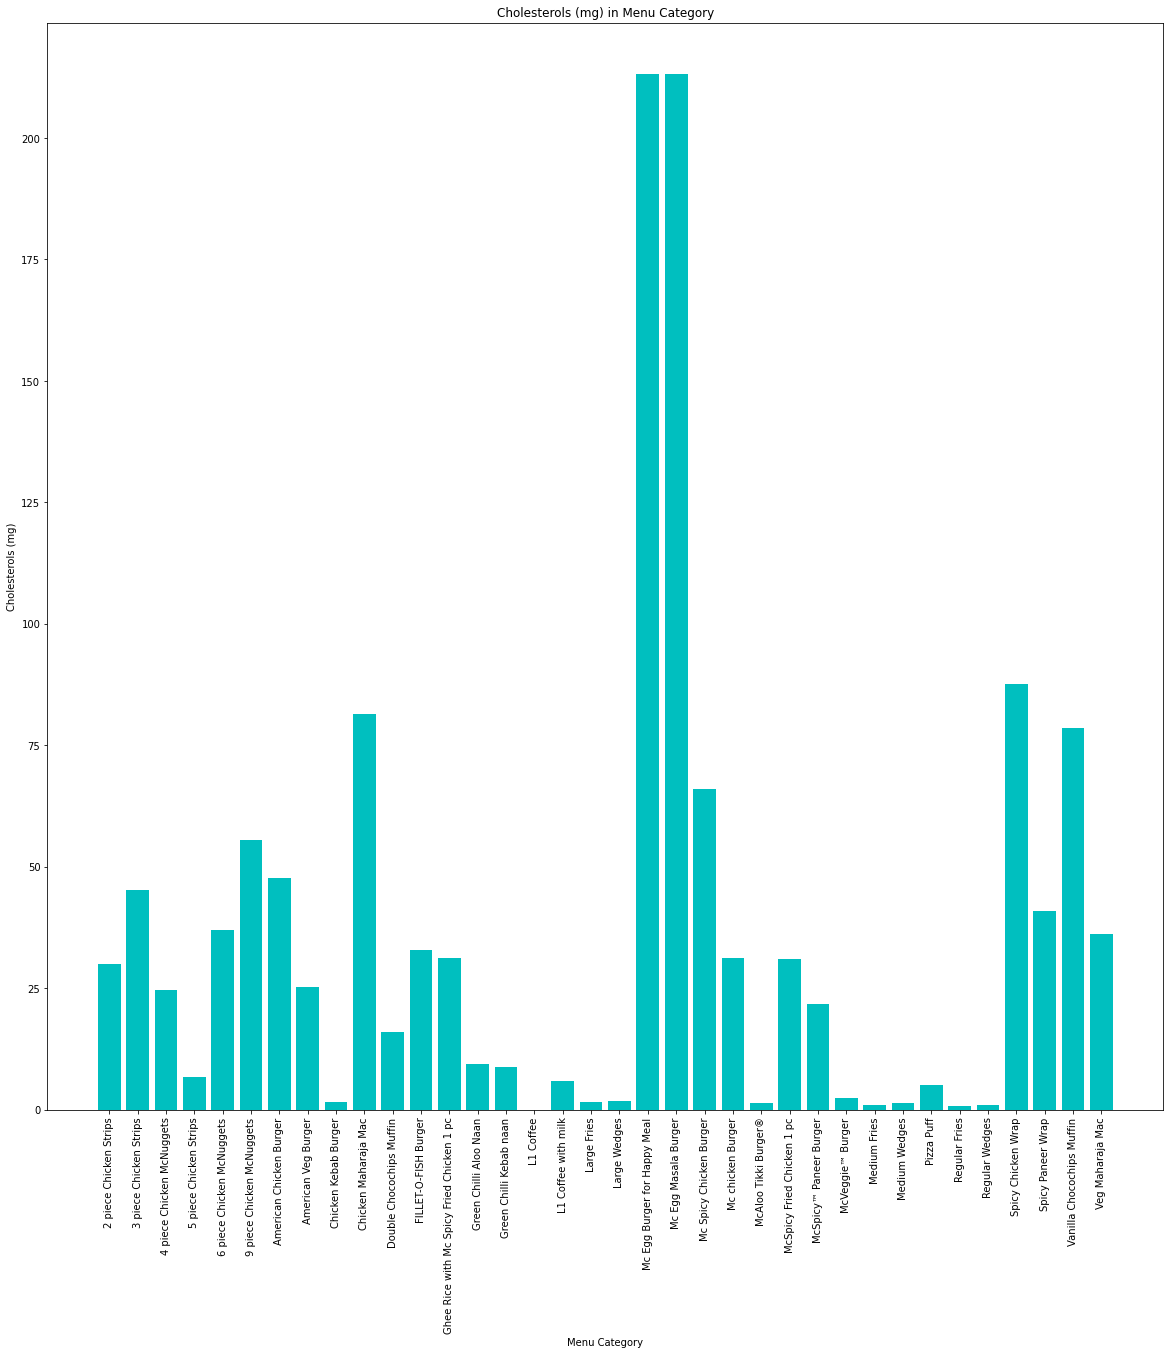

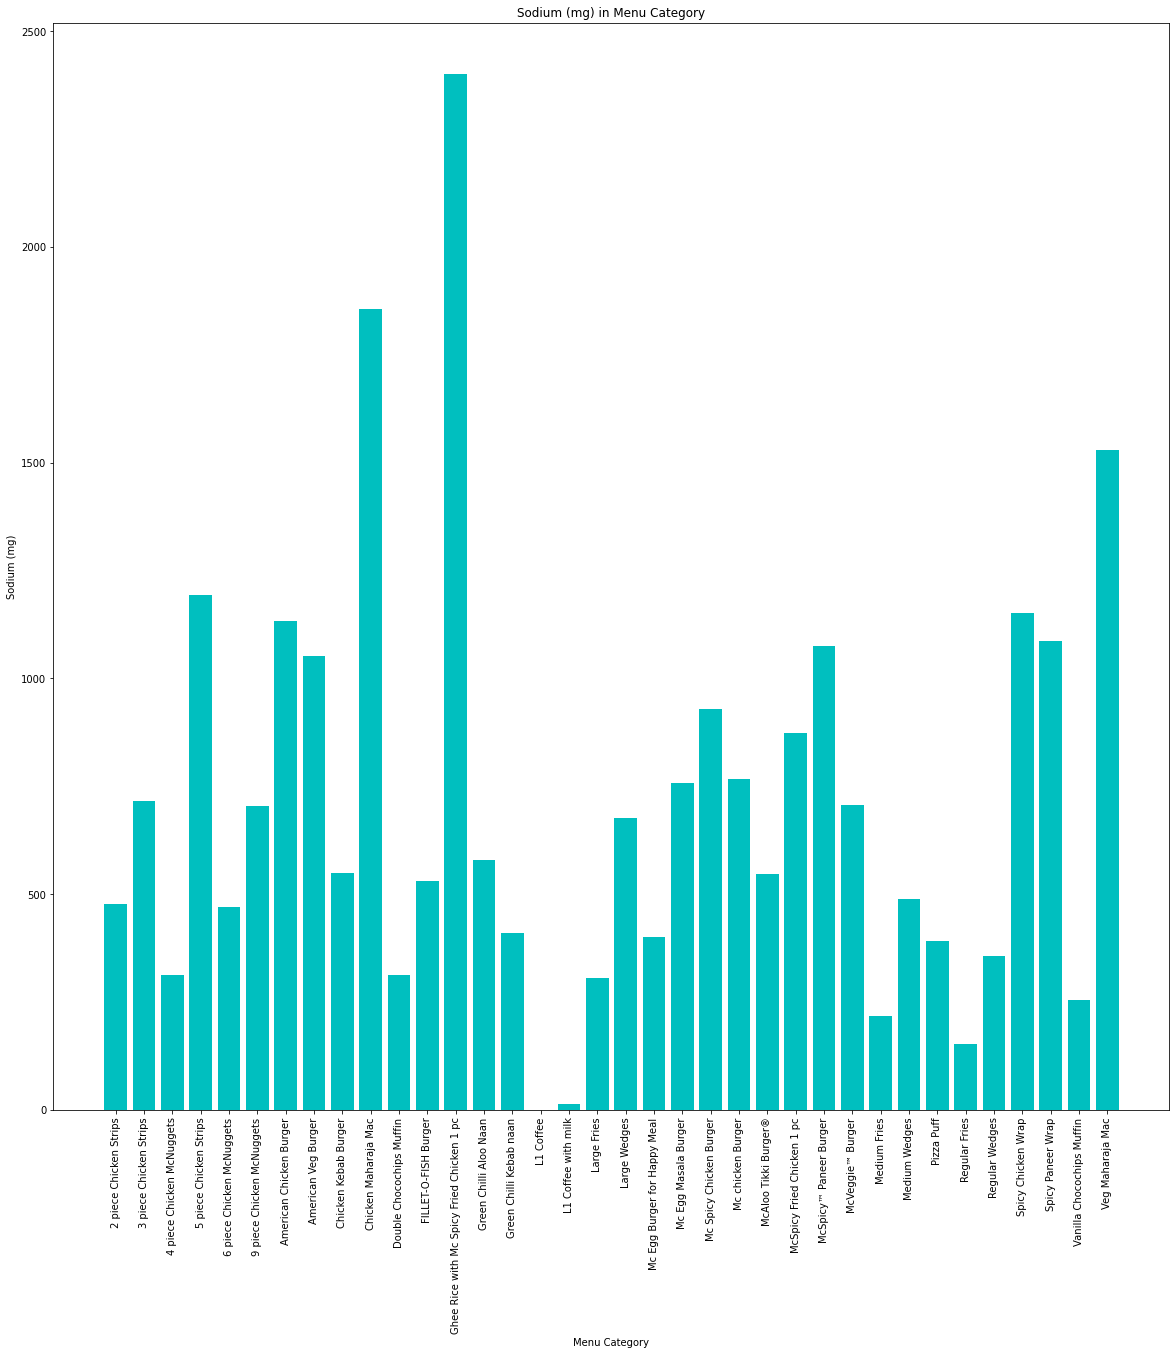

In [12]:
for i in high_regular:
    s = df[df["Menu Category"] == "Regular Menu"]
    d = s.groupby("Menu Items").agg("sum") #group with sum
    y = d[i]
    mylabels = d.index
    fig = plt.figure(figsize = (20, 20))
    # creating the bar plot
    plt.bar(mylabels, y, color ='c')

    plt.xlabel("Menu Category")
    plt.xticks(rotation='vertical')
    plt.ylabel(i)
    plt.title("{} in Menu Category".format(i))
    plt.show()